In [1]:
import pandas as pd
import numpy

# Read csv from Behavior Space experiment
df =  pd.read_csv("NGA-influenced-table.csv")

# Parse vectors
df["Total Utility"] = df["Total Utility"].apply(lambda array: numpy.fromstring(array[1:-1], sep = ' ', dtype = float))  
df["Social Policy Vector"] = df["Social Policy Vector"].apply(lambda array: numpy.fromstring(array[1:-1], sep = ' ', dtype = float))  


In [5]:

# Find every combination of Range, Strength, and NGA or 1p1v
Percentages = df[["Influencer Range", "Influencer Strength", "NGA?"]].drop_duplicates()
Percentages = pd.concat([Percentages, pd.DataFrame(columns = ["% Efficient Outcome"])], sort = True)

# Find the percentages of positive payoffs for each combination
groups = df.groupby(["Influencer Range", "Influencer Strength", "NGA?"])

#Define functions for mapping a lists of lists to be it's first or second index
firstitem = lambda d : d.apply(lambda x: int(x[0]))
seconditem = lambda d : d.apply(lambda x: int(x[1]))

for params, group in groups:
    # Calculate the percentages of runs that have at least one of the directions of the utility be positive, and the percentage of runs that have both directions be positve
    NumberOfRuns = group["Total Utility"].size
    NumberOfEfficientOutcomes = pd.to_numeric((firstitem(group["Total Utility"]) > 0) & (seconditem(group["Total Utility"]) > 1)).sum()
    PercentageEfficient = NumberOfEfficientOutcomes / NumberOfRuns * 100
    
    # Find the index in percentages to send, and input the Percentages.
    EditingIndex = Percentages[(Percentages["Influencer Range"] == params[0]) &
                (Percentages["Influencer Strength"] == params[1]) &
                (Percentages["NGA?"] == params[2])].index[0]
    Percentages.loc[EditingIndex, "% Efficient Outcome"] = PercentageEfficient

In [7]:
#Find lists of Ranges and Strengths, sorted
Ranges = list(map(lambda value: float(value), Percentages["Influencer Range"].drop_duplicates().sort_values()))
Strengths = list(map(lambda value: float(value), Percentages["Influencer Strength"].drop_duplicates().sort_values()))

# NGAPercentages = Percentages[Percentages["NGA?"]]
NGAPercentages = []
# OPOVPercentages = Percentages[~ Percentages["NGA?"]]
OPOVPercentages = []

for index in range(len(Ranges)):
    # Make new List, and add each percentage to it for a given range
    NGAPercentages.append([])
    OPOVPercentages.append([])
    for strength in Strengths:
        NGAPercentages[int(index)].append(Percentages[(Percentages["Influencer Strength"] == strength) & 
                                                (Percentages["Influencer Range"] == Ranges[index]) & (Percentages["NGA?"] == True)] # I literally have no idea why ~bool is not working
                                                 ["% Efficient Outcome"].get_values()[0])
        OPOVPercentages[int(index)].append(Percentages[(Percentages["Influencer Strength"] == strength) & 
                                                (Percentages["Influencer Range"] == Ranges[index]) & (Percentages["NGA?"] == False)]
                                                 ["% Efficient Outcome"].get_values()[0])


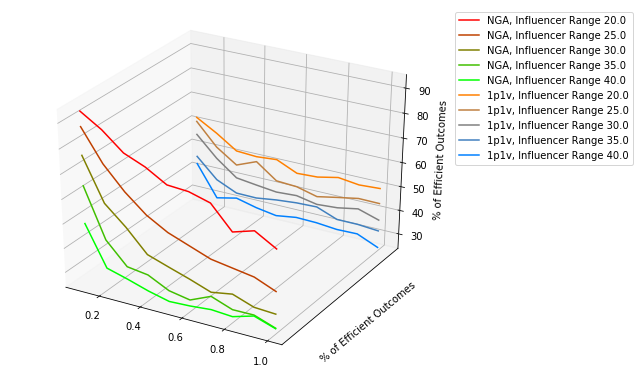

In [9]:

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# Marked as unused, but needed to register '3d' projection
from mpl_toolkits.mplot3d import Axes3D 


fig = plt.figure()
# ax = fig.gca()
ax = fig.gca(projection = "3d")

# Set font size and constant strings
SMALL_FONT = FontProperties().set_size('small')
TITLE = 'Percentage of elections with efficient outcomes vs. Influencer Strength and Range'
XLABEL = 'influencer Strength'
YLABEL = '% of Efficient Outcomes'

#Define functions for finding line colors from a range
NGAColor = lambda range: (1 - (range - 20)/20,(range - 20)/20, 0)
OPOVColor = lambda range: (1 - (range - 20)/20, .5, (range - 20)/20)

# NGA and OPOV are in separate for loops, so the legend is in a better order
for index in range(len(Ranges)):
    y = NGAPercentages[index]
    x = Strengths
    
    ax.plot(x, y, zs = 0, zdir = 'y', color = NGAColor(Ranges[index]), label = "NGA, Influencer Range "+str(Ranges[index]))
    # The plot function below this line was used for 2d graphs
    # ax.plot(x, y, color = NGAColor(Ranges[index]), label = "NGA, Influencer Range "+str(Ranges[index]))


for index in range(len(Ranges)):
    y = OPOVPercentages[index]
    x = Strengths
    
    ax.plot(x, y, zs = 1, zdir = 'y', color = OPOVColor(Ranges[index]), label = "1p1v, Influencer Range "+str(Ranges[index]))

    
plt.legend(bbox_to_anchor= (1,1), prop = SMALL_FONT)
# plt.xlabel(XLABEL) # for 2d 
ax.set_zlabel(YLABEL)
plt.ylabel(YLABEL)
ax.get_yaxis().set_visible(False)
ax.get_yaxis().set_ticks([])
plt.gcf().subplots_adjust(top = 1.25, bottom = 0, right = 1.15)
plt.show()

Don't do 3d, just do it normally 

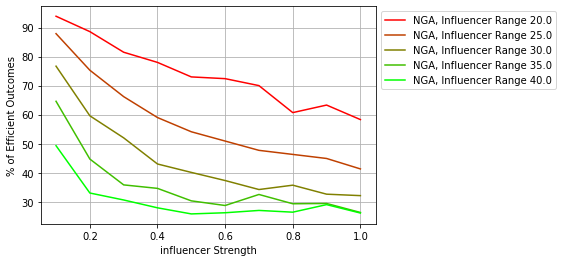

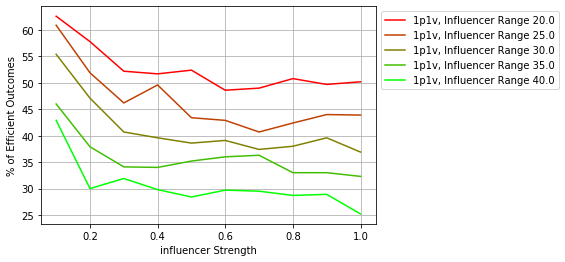

In [13]:

# NGA and OPOV are in separate for loops, so the legend is in a better order
for index in range(len(Ranges)):
    y = NGAPercentages[index]
    x = Strengths
    plt.plot(x, y, color = NGAColor(Ranges[index]), label = "NGA, Influencer Range "+str(Ranges[index]))
plt.legend(bbox_to_anchor= (1,1), prop = SMALL_FONT)
plt.ylabel(YLABEL)
plt.xlabel(XLABEL)
plt.grid()
plt.show()

for index in range(len(Ranges)):
    y = OPOVPercentages[index]
    x = Strengths
    
    plt.plot(x, y, color = NGAColor(Ranges[index]), label = "1p1v, Influencer Range "+str(Ranges[index]))
plt.ylabel(YLABEL)
plt.xlabel(XLABEL)  
plt.legend(bbox_to_anchor= (1,1), prop = SMALL_FONT)
plt.grid()
plt.show()
